<a href="https://colab.research.google.com/github/yuliagrajewska/Computer-Vision-projects/blob/main/image_classification/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [ ]:
def normalize(data): #returns the data normalized to range [-1,1]
    return 2*(data/255)-1

In [ ]:
#function for opening the data - from the readme of the dataset
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        d = pickle.load(fo, encoding='bytes')
    data = np.asarray(d.get(b'data'))
    answers = np.asarray(d.get(b'labels'))
    return data,answers

In [ ]:
class ImageDataset(Dataset): #class for creating an image dataset
    def __init__(self, im, answers):
        self.answers = torch.from_numpy(answers).type(torch.LongTensor)
        self.im = torch.from_numpy(im).type(torch.float32)

    def __len__(self):
        return len(self.answers)
    def __getitem__(self, idx):
        answer = self.answers[idx]
        img = self.im[idx]

        return (img,answer)

In [ ]:
#loading all the test & train files
test,test_key = unpickle('cifar-10-batches-py/test_batch')
t1data, t1key = unpickle('cifar-10-batches-py/data_batch_1')
t2data, t2key = unpickle('cifar-10-batches-py/data_batch_2')
t3data, t3key = unpickle('cifar-10-batches-py/data_batch_3')
t4data, t4key = unpickle('cifar-10-batches-py/data_batch_4')
t5data, t5key = unpickle('cifar-10-batches-py/data_batch_5')


In [ ]:
#normalizing all the data
test = normalize(test)
t1data = normalize(t1data)
t2data = normalize(t2data)
t3data = normalize(t3data)
t4data = normalize(t4data)
t5data = normalize(t5data)


In [ ]:
#formatting the data so that pytorch doesn't complain
train = np.concatenate((t1data,t2data,t3data,t4data,t5data), axis = 0)
train_temp = []
for d in train:
    a = np.split(d,3)
    train_temp.append(a)
train_temp = np.asarray(train_temp)
a_temp = []
for d in train_temp:
    temp = []
    for a in d:
        #print(a.shape)
        b = np.split(a,32)
        temp.append(b)
    a_temp.append(temp)
train_data = np.asarray(a_temp)

#print(train_data.shape)
train_key =  np.concatenate((t1key,t2key,t3key,t4key,t5key), axis = 0)
#print(train_data.shape)

(50000, 3, 32, 32)


In [ ]:
test_temp = []
for d in test:
    a = np.split(d,3)
    test_temp.append(a)
a_temp = []
for d in test_temp:
    temp = []
    for a in d:
        #print(a.shape)
        b = np.split(a,32)
        temp.append(b)
    a_temp.append(temp)
test_data = np.asarray(a_temp)
#print(test_data.shape)

(10000, 3, 32, 32)


In [ ]:
trainset = ImageDataset(train_data,train_key)
testset = ImageDataset(test_data, test_key)

In [ ]:
batch_size = 50
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False)
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
n_batches = int(train_data.shape[0] / batch_size)
#print(n_batches)

1000


In [ ]:
#CNN class
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 10)
#         self.fc1 = nn.Linear(16 * 5 * 5, 120)
#         self.fc2 = nn.Linear(120, 84)
#         self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = self.fc1(x)
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
        return x

In [ ]:
cnn = CNN()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn.parameters(), lr=0.0005, weight_decay=0.001)

In [ ]:
loss_arr = []
for epoch in range(10):

    r_loss = 0.0
    for i, data in enumerate(trainloader,0):

        inputs, labels = data
        optimizer.zero_grad()
        outputs = cnn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        r_loss += loss.item()
        if i % 250 == 249:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {r_loss / 250:.3f}')
            loss_arr.append(r_loss/250)
            #print('loss appended')
            r_loss = 0.0

print('done')

[1,   250] loss: 0.947
[1,   500] loss: 0.928
[1,   750] loss: 0.943
[1,  1000] loss: 0.940
[2,   250] loss: 0.933
[2,   500] loss: 0.944
[2,   750] loss: 0.922
[2,  1000] loss: 0.955
[3,   250] loss: 0.927
[3,   500] loss: 0.930
[3,   750] loss: 0.932
[3,  1000] loss: 0.960
[4,   250] loss: 0.924
[4,   500] loss: 0.932
[4,   750] loss: 0.931
[4,  1000] loss: 0.952
[5,   250] loss: 0.922
[5,   500] loss: 0.935
[5,   750] loss: 0.942
[5,  1000] loss: 0.927
[6,   250] loss: 0.921
[6,   500] loss: 0.921
[6,   750] loss: 0.941
[6,  1000] loss: 0.938
[7,   250] loss: 0.916
[7,   500] loss: 0.931
[7,   750] loss: 0.939
[7,  1000] loss: 0.927
[8,   250] loss: 0.932
[8,   500] loss: 0.912
[8,   750] loss: 0.941
[8,  1000] loss: 0.932
[9,   250] loss: 0.924
[9,   500] loss: 0.939
[9,   750] loss: 0.918
[9,  1000] loss: 0.921
[10,   250] loss: 0.923
[10,   500] loss: 0.921
[10,   750] loss: 0.922
[10,  1000] loss: 0.932
done


In [ ]:
classification = cnn(images)

In [ ]:
#testing
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        classification = cnn(images)
        _, predicted = torch.max(classification.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'accuracy on the test images: {100 * correct // total} %')

accuracy on the test images: 64 %


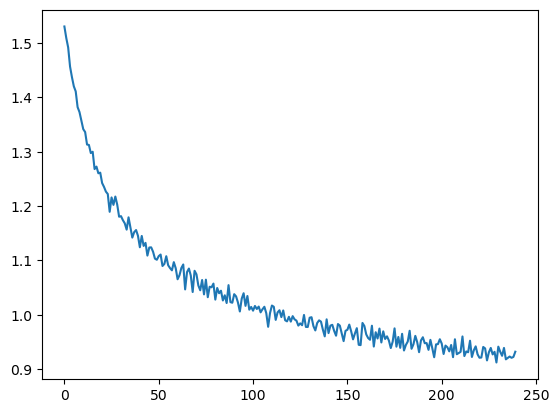

In [ ]:
#plot loss over training
len(loss_arr)
x = np.arange(len(loss_arr))
plt.plot(x,loss_arr)